<a href="https://colab.research.google.com/github/Devulapally-hansika/word2vec/blob/main/multiheadattention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the 'verdict.txt' file
uploaded = files.upload()


Saving verdict.txt to verdict (1).txt


In [ ]:
with open('verdict.txt', 'r') as f:
    text = f.read().lower().splitlines()  # Lowercase and split into sentences

print("First 2 sentences:", text[:2])


First 2 sentences: ['i had always thought jack gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the riviera. (though i rather thought it would have been rome or florence.)', '']


In [ ]:
with open('verdict.txt', 'r') as f:
    verdict_data = f.read().lower().splitlines()  # Lowercase and split into sentences

print("First 2 sentences:")
for i, sentence in enumerate(verdict_data[:2], 1):
    print(f"{i}. {sentence}")


First 2 sentences:
1. i had always thought jack gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the riviera. (though i rather thought it would have been rome or florence.)
2. 


In [ ]:
import re

# Tokenize and clean the text
tokens = []
for sentence in verdict_data:
    if sentence:  # Check if the sentence is not empty
        # Remove punctuation and non-alphabetic characters, then split into words
        cleaned_sentence = re.sub(r'[^a-z\s]', ' ', sentence)  # Replace punctuation with space
        cleaned_sentence = re.sub(r'\s+', ' ', cleaned_sentence).strip()  # Remove extra spaces
        tokens.extend([word for word in cleaned_sentence.split() if word not in stopwords])

print("First 20 cleaned tokens:", tokens[:20])


First 20 cleaned tokens: ['i', 'had', 'always', 'thought', 'jack', 'gisburn', 'rather', 'cheap', 'genius', 'though', 'good', 'fellow', 'enough', 'so', 'was', 'no', 'great', 'surprise', 'me', 'hear']


In [ ]:
# Example stopwords list (you can customize this)
stopwords = set(['i', 'had', 'a', 'the', 'and', 'to', 'of', 'in', 'is', 'it', 'that', 'so', 'was', 'me'])

# Remove stopwords from tokens
filtered_tokens = [word for word in tokens if word not in stopwords]

print("First 20 filtered tokens:", filtered_tokens[:20])


First 20 filtered tokens: ['always', 'thought', 'jack', 'gisburn', 'rather', 'cheap', 'genius', 'though', 'good', 'fellow', 'enough', 'no', 'great', 'surprise', 'hear', 'height', 'his', 'glory', 'he', 'dropped']


In [ ]:
from collections import Counter

# Count the frequency of each token
token_counts = Counter(filtered_tokens)

# Display the 10 most common tokens
print("Most common tokens:", token_counts.most_common(10))



Most common tokens: [('he', 79), ('his', 65), ('my', 43), ('s', 38), ('him', 33), ('with', 32), ('t', 31), ('she', 29), ('on', 28), ('you', 28)]


In [ ]:
# Expanded stopwords list
stopwords = set(['i', 'had', 'a', 'the', 'and', 'to', 'of', 'in', 'is', 'it', 'that', 'so', 'was', 'me',
                  'he', 'his', 'my', 's', 'him', 'with', 't', 'she', 'on', 'you'])

# Re-filter tokens
filtered_tokens = [word for word in tokens if word not in stopwords]

# Count the frequency of each token again
token_counts = Counter(filtered_tokens)

# Display the 10 most common tokens
print("Most common tokens after re-filtering:", token_counts.most_common(10))


Most common tokens after re-filtering: [('have', 26), ('as', 25), ('but', 23), ('one', 23), ('mrs', 22), ('at', 22), ('up', 21), ('her', 21), ('gisburn', 19), ('been', 18)]


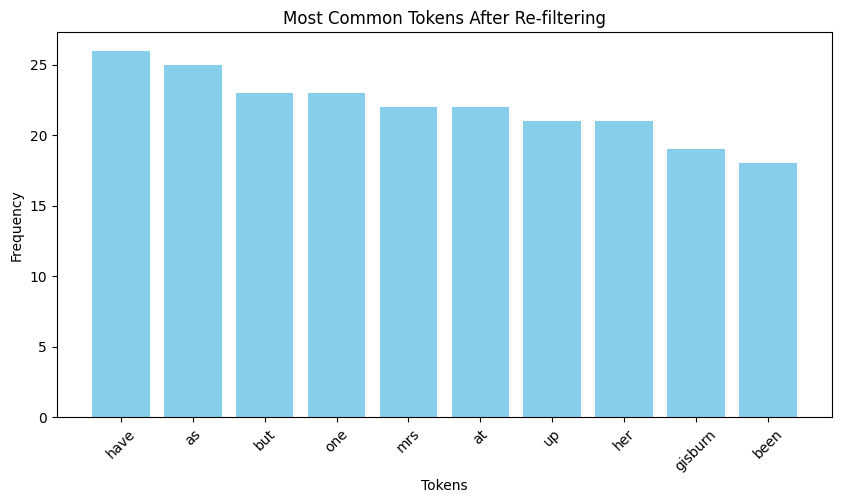

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Sample token counts
token_counts = [('have', 26), ('as', 25), ('but', 23), ('one', 23), ('mrs', 22),
                ('at', 22), ('up', 21), ('her', 21), ('gisburn', 19), ('been', 18)]

# Unzip the token counts into two lists
words, counts = zip(*token_counts)

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Most Common Tokens After Re-filtering')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from nltk import bigrams

# Generate bigrams from the filtered tokens
bigrams_list = list(bigrams(filtered_tokens))

# Display the first 10 bigrams
print("First 10 bigrams:", bigrams_list[:10])


First 10 bigrams: [('always', 'thought'), ('thought', 'jack'), ('jack', 'gisburn'), ('gisburn', 'rather'), ('rather', 'cheap'), ('cheap', 'genius'), ('genius', 'though'), ('though', 'good'), ('good', 'fellow'), ('fellow', 'enough')]


In [ ]:
import numpy as np

# Create a list of unique words from the bigrams
all_words = list(set([word for bi in bigrams_list for word in bi]))
all_words.sort()

# Create a dictionary to map words to indices
words_dict = {word: i for i, word in enumerate(all_words)}

# Create one-hot encoded vectors for each word
onehot_data = np.zeros((len(all_words), len(all_words)))

for i in range(len(all_words)):
    onehot_data[i][i] = 1

# Create a dictionary to map words to their one-hot encoded vectors
onehot_dict = {word: onehot_data[words_dict[word]] for word in all_words}

# Prepare the input (X) and output (Y) for training
X = []
Y = []

for bi in bigrams_list:
    X.append(onehot_dict[bi[0]])
    Y.append(onehot_dict[bi[1]])

X = np.array(X)
Y = np.array(Y)

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (2369, 1049)
Shape of Y: (2369, 1049)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

embed_size = 100  # Size of word embeddings (can adjust as needed)

# Build the model
model = Sequential([
    Dense(embed_size, activation='linear', input_shape=(X.shape[1],)),  # Embedding layer
    Dense(Y.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Print model summary
model.summary()

# Train the model (use smaller batch_size if memory issues)
history = model.fit(X, Y, epochs=50, batch_size=128, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │       105,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1049)           │       105,949 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 210,949 (824.02 KB)

 Trainable params: 210,949 (824.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 6.9544
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.9237
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.8883
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.8331
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.7504
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.6320
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.4937
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.3513
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.2248
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.1934
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.1386
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.0511
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.9824
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.8841
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.8118
Epoc

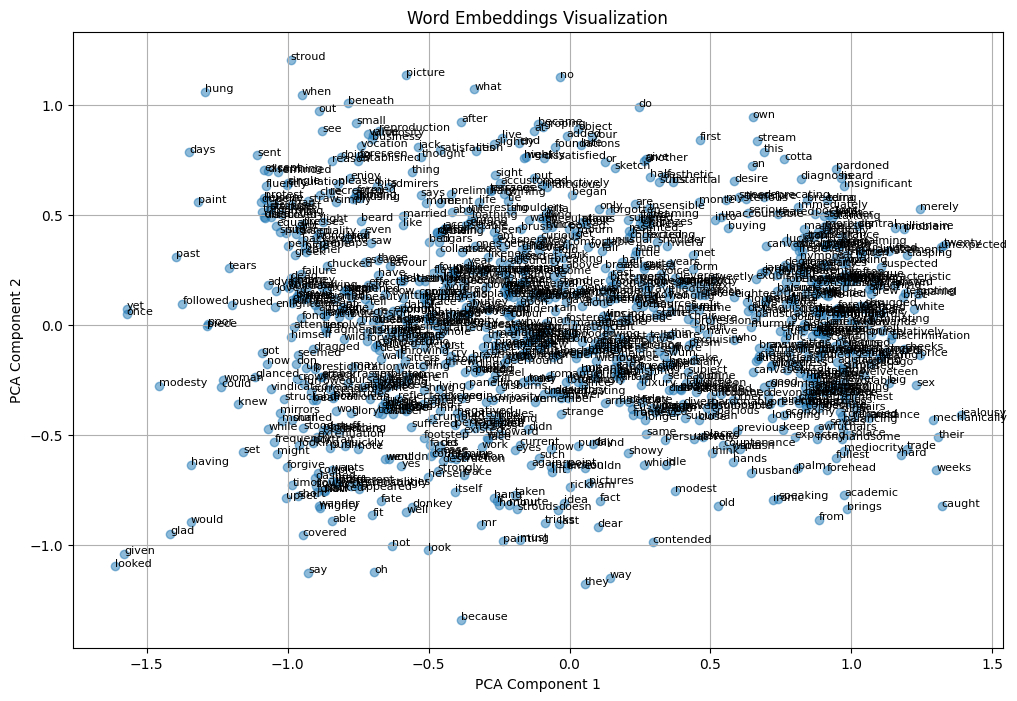

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract the learned embeddings
embeddings = model.layers[0].get_weights()[0]

# Perform PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Create a scatter plot of the embeddings
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5)

# Annotate points with words
for i, word in enumerate(all_words):
    plt.annotate(word, xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=8)

plt.title('Word Embeddings Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()


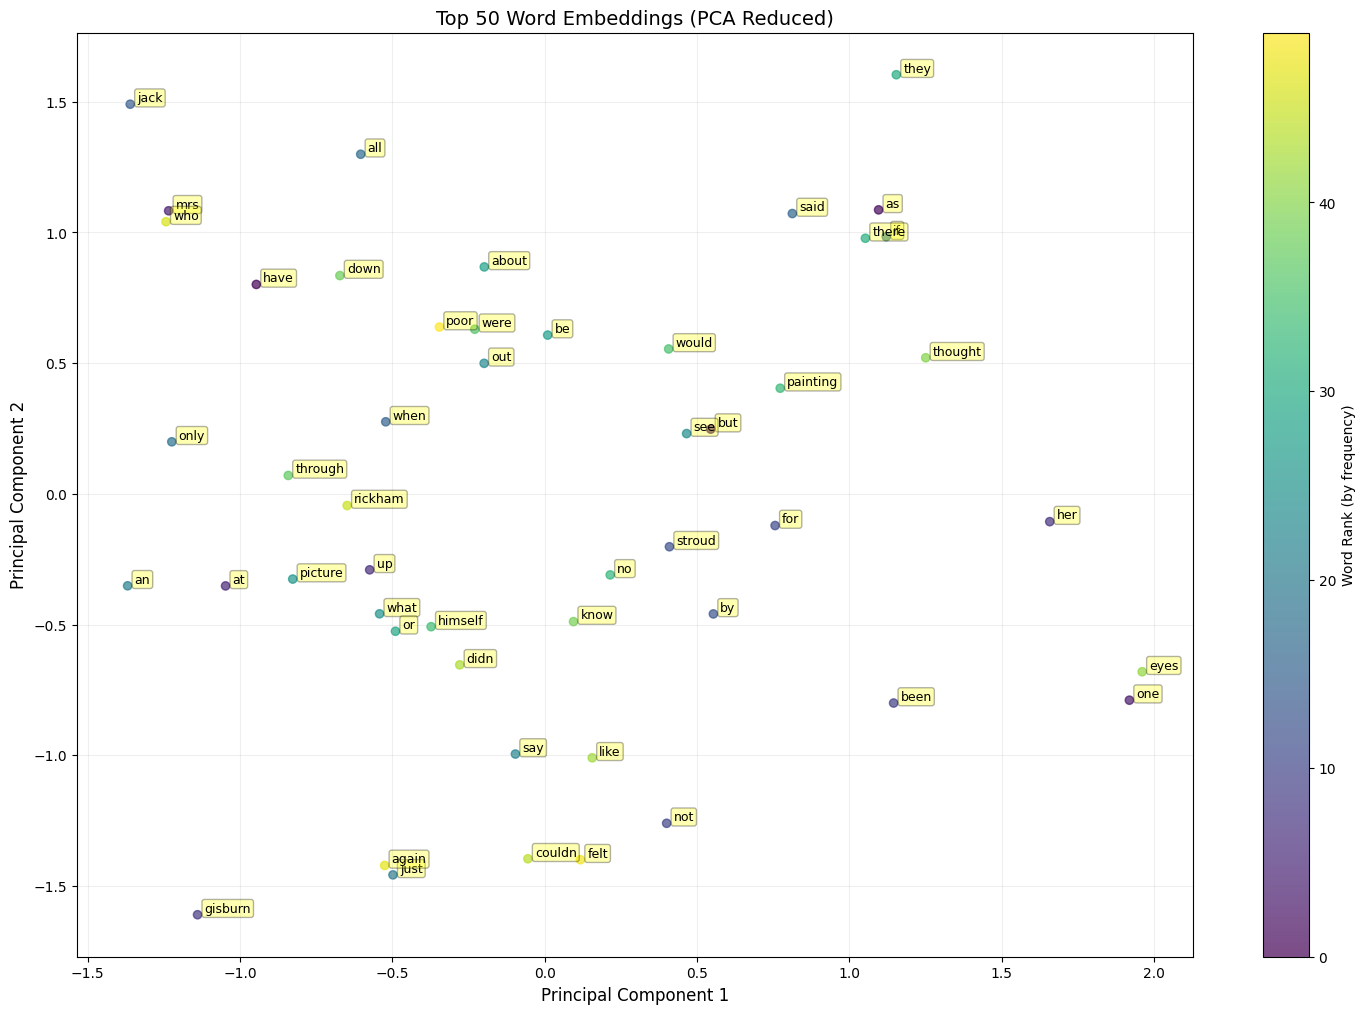

In [ ]:
from collections import Counter
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Count the frequency of each token again
token_counts = Counter(filtered_tokens)

# Get the most common 50 words
top_words = [word for word, count in token_counts.most_common(50)]
top_indices = [words_dict[word] for word in top_words]

# Get their embeddings
embeddings = model.layers[0].get_weights()[0]
top_embeddings = embeddings[top_indices]

# Reduce to 2D using PCA
pca = PCA(n_components=2)
reduced_embeds = pca.fit_transform(top_embeddings)

# Create the plot
plt.figure(figsize=(18, 12))
plt.scatter(reduced_embeds[:, 0], reduced_embeds[:, 1],
            c=range(len(top_words)), cmap='viridis', alpha=0.7)

# Annotate with intelligence
for i, word in enumerate(top_words):
    plt.annotate(word,
                xy=(reduced_embeds[i, 0], reduced_embeds[i, 1]),
                xytext=(5, 2),
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.2',
                         fc='yellow', alpha=0.3))

plt.title('Top 50 Word Embeddings (PCA Reduced)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(alpha=0.2)
plt.colorbar(label='Word Rank (by frequency)')
plt.show()


In [ ]:
import numpy as np

def get_positional_encoding(max_seq_len, embed_dim):
    position = np.arange(max_seq_len)[:, np.newaxis]
    div_term = np.exp(np.arange(0, embed_dim, 2) * (-np.log(10000.0) / embed_dim))

    pe = np.zeros((max_seq_len, embed_dim))
    pe[:, 0::2] = np.sin(position * div_term)
    pe[:, 1::2] = np.cos(position * div_term)

    return pe

# Parameters (match your embedding size)
embed_size = 100
max_seq_length = len(all_words)  # Or your maximum sequence length

# Generate positional encodings
pos_encoding = get_positional_encoding(max_seq_length, embed_size)


In [ ]:
# Ensure embeddings and positional encodings are aligned
word_embeddings = model.layers[0].get_weights()[0]

# Add positional encoding to word embeddings
combined_embeddings = word_embeddings + pos_encoding[:len(word_embeddings)]

# Now use combined_embeddings for visualization instead of raw word_embeddings


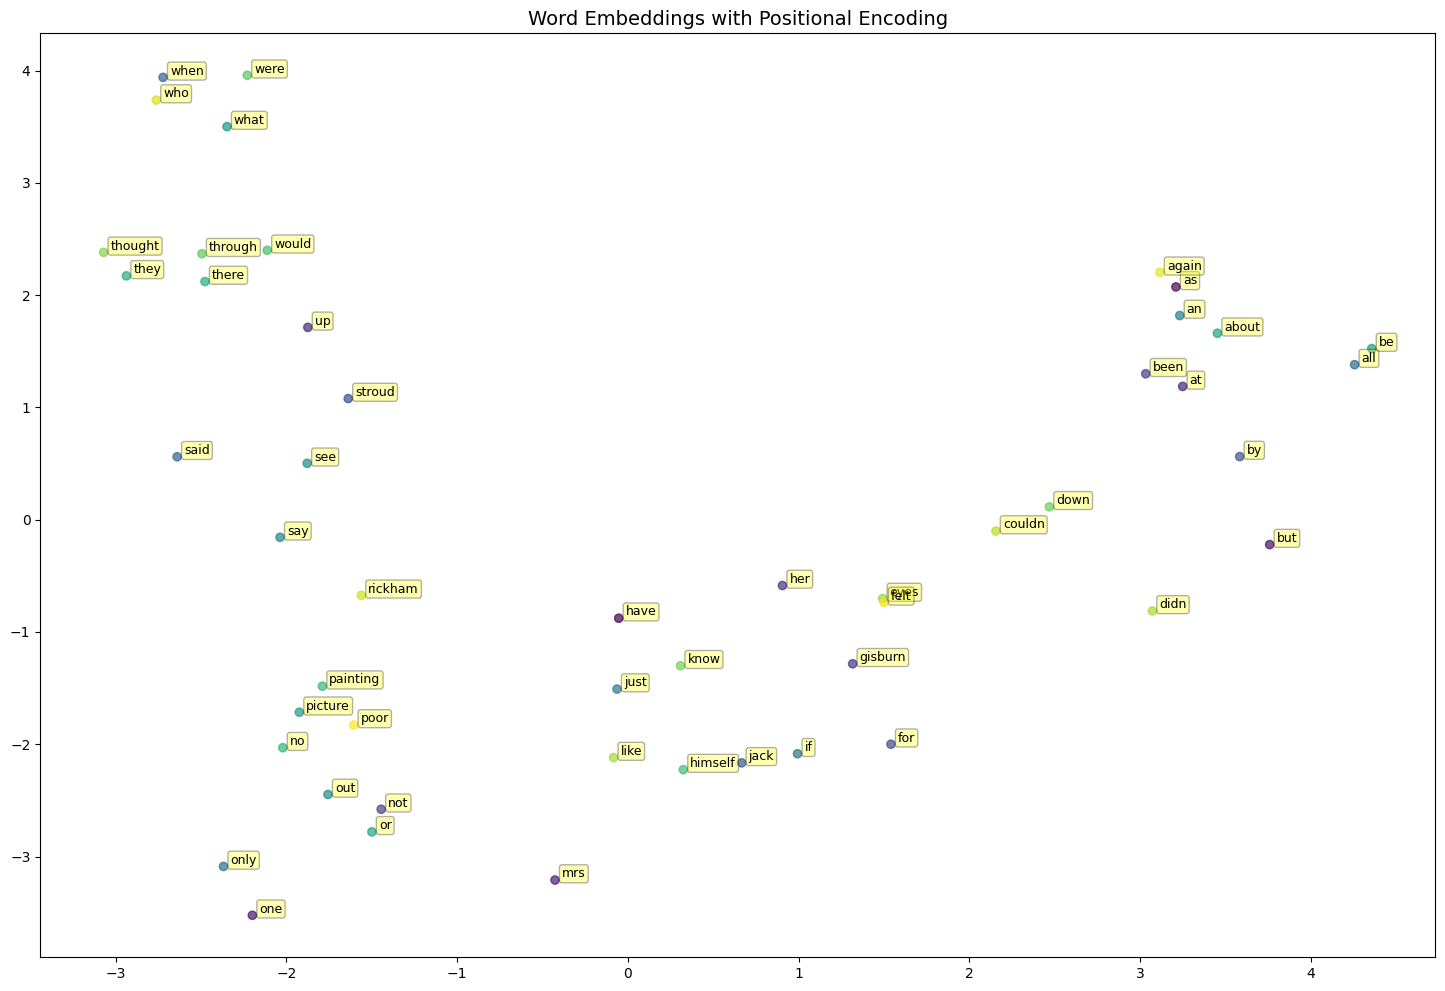

In [ ]:
# For top 50 words
top_indices = [words_dict[word] for word in top_words]
top_combined = combined_embeddings[top_indices]

# PCA and plot (same as before but with top_combined)
pca = PCA(n_components=2)
reduced_combined = pca.fit_transform(top_combined)

plt.figure(figsize=(18, 12))
plt.scatter(reduced_combined[:, 0], reduced_combined[:, 1],
            c=range(len(top_words)), cmap='viridis', alpha=0.7)

for i, word in enumerate(top_words):
    plt.annotate(word,
                xy=(reduced_combined[i, 0], reduced_combined[i, 1]),
                xytext=(5, 2),
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))

plt.title('Word Embeddings with Positional Encoding', fontsize=14)
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, embed_size, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.embed_size = embed_size
        self.num_heads = num_heads
        self.head_dim = embed_size // num_heads

        assert self.head_dim * num_heads == embed_size, "Embed size must be divisible by num_heads"

        self.wq = Dense(embed_size)
        self.wk = Dense(embed_size)
        self.wv = Dense(embed_size)
        self.dense = Dense(embed_size)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.head_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def scaled_dot_product_attention(self, q, k, v):
        matmul_qk = tf.matmul(q, k, transpose_b=True)
        dk = tf.cast(tf.shape(k)[-1], tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        output = tf.matmul(attention_weights, v)

        return output, attention_weights

    def call(self, v, k, q):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        attention_output, attention_weights = self.scaled_dot_product_attention(q, k, v)

        attention_output = tf.transpose(attention_output, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(attention_output, (batch_size, -1, self.embed_size))

        return concat_attention, attention_weights


In [ ]:
# Sample word embeddings (replace with your actual embeddings)
word_embeddings = {
    "jack": np.random.rand(2),
    "gisburn": np.random.rand(2),
    "rather": np.random.rand(2),
    "cheap": np.random.rand(2),
    # Add more words as needed
}

# Convert word embeddings to tensor format
word_list = list(word_embeddings.keys())
embedding_matrix = np.array([word_embeddings[word] for word in word_list])
embedding_matrix = tf.convert_to_tensor(embedding_matrix, dtype=tf.float32)
embedding_matrix = tf.expand_dims(embedding_matrix, axis=0)  # Add batch dimension

print("Embedding matrix shape:", embedding_matrix.shape)
print("Vocabulary size:", len(word_list))


Embedding matrix shape: (1, 4, 2)
Vocabulary size: 4


In [ ]:
num_heads = 2  # Set the number of heads
multihead_attn = MultiHeadAttention(embed_size=2, num_heads=num_heads)

# Get attention outputs and weights
attention_output, attention_weights = multihead_attn(
    v=embedding_matrix,
    k=embedding_matrix,
    q=embedding_matrix
)

print("\nAttention Weights Shape:", attention_weights.shape)
print("Attention Output Shape:", attention_output.shape)



Attention Weights Shape: (1, 2, 4, 4)
Attention Output Shape: (1, 4, 2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'multi_head_attention_4', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


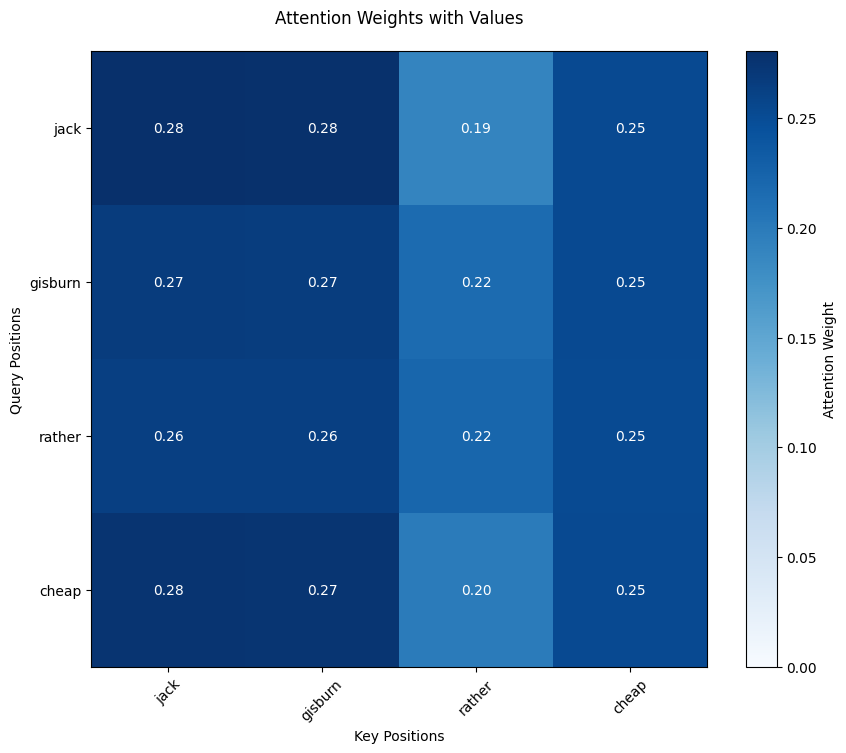

In [ ]:
# Assuming attention_weights is already computed from previous cells
weights = attention_weights.numpy()[0]  # Take first batch item
weights = np.squeeze(weights)          # Remove extra dimensions

# For multi-head attention - select first head's weights
if len(weights.shape) == 3:  # Shape: (heads, seq_len, seq_len)
    weights = weights[0]     # First head

# Create figure
plt.figure(figsize=(10, 8))
plt.imshow(weights, cmap='Blues', vmin=0, vmax=weights.max())

# Add text annotations
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        plt.text(j, i, f'{weights[i, j]:.2f}',
                 ha='center', va='center',
                 color='black' if weights[i, j] < weights.max()*0.6 else 'white')

# Formatting
plt.title("Attention Weights with Values", pad=20)
plt.xlabel("Key Positions")
plt.ylabel("Query Positions")
plt.colorbar(label='Attention Weight')
plt.xticks(range(len(word_list)), word_list, rotation=45)
plt.yticks(range(len(word_list)), word_list)
plt.show()
